> EbayesThresh

In [506]:
from itstgcn.learners import * 

In [507]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [508]:
from rpy2.robjects.vectors import FloatVector
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import rpy2.robjects.numpy2ri as rpyn
ebayesthresh = importr('EbayesThresh').ebayesthresh

In [509]:
T = 100

In [510]:
t = np.arange(T)/T * 10

In [511]:
y_true = 3*np.sin(0.5*t) + 1.2*np.sin(1.0*t) + 0.5*np.sin(1.2*t) 

In [512]:
y = y_true + np.random.normal(size=T)

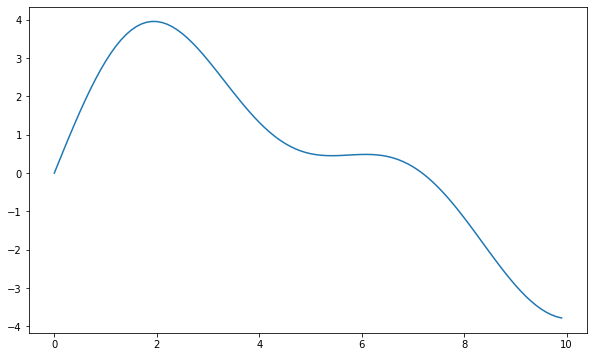

In [513]:
plt.figure(figsize=(10,6))
plt.plot(t,y_true)

`-` 관찰한 신호 

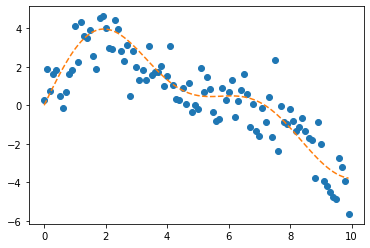

In [528]:
plt.plot(t,y,'o')
plt.plot(t,y_true,'--')

`-` 퓨리에 변환 

In [529]:
f = np.array(y)
if len(f.shape)==1: f = f.reshape(-1,1)
T,N = f.shape
Psi = make_Psi(T)
fbar = Psi.T @ f # apply dft 

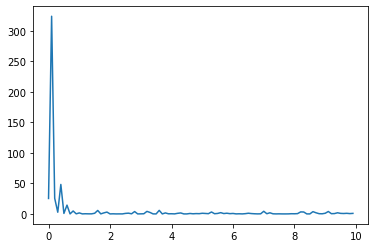

In [530]:
plt.plot(t,fbar**2) # periodogram 

`-` threshed 

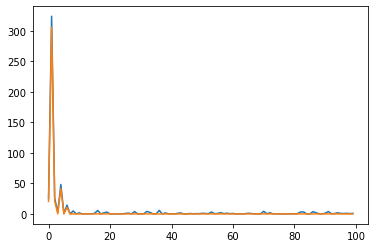

In [518]:
fbar_threshed = np.stack([ebayesthresh(FloatVector(fbar[:,i])) for i in range(N)],axis=1)
plt.plot((fbar**2)) # periodogram 
plt.plot((fbar_threshed**2)) 

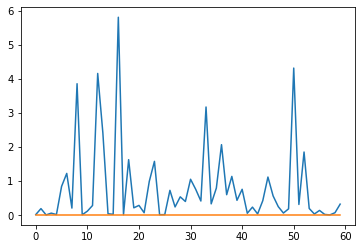

In [519]:
plt.plot((fbar**2)[20:80]) # periodogram 
plt.plot((fbar_threshed**2)[20:80]) 

`-` 역퓨리에변환 

In [520]:
yhat = Psi @ fbar_threshed # inverse dft

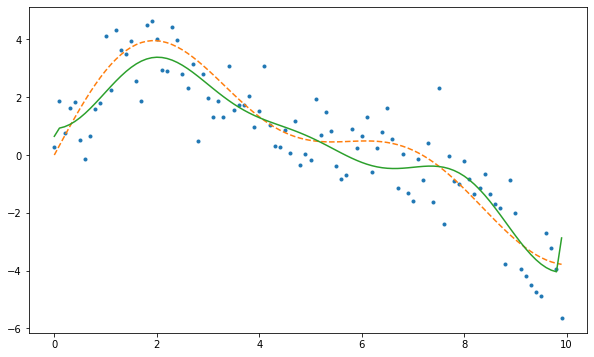

In [521]:
plt.figure(figsize=(10,6))
plt.plot(t,y,'.')
plt.plot(t,y_true,'--')
plt.plot(t,yhat)

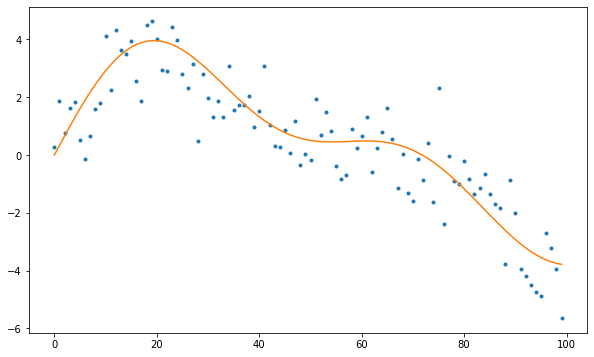

In [522]:
plt.figure(figsize=(10,6))
plt.plot(y,'.')
plt.plot(y_true)

# Result

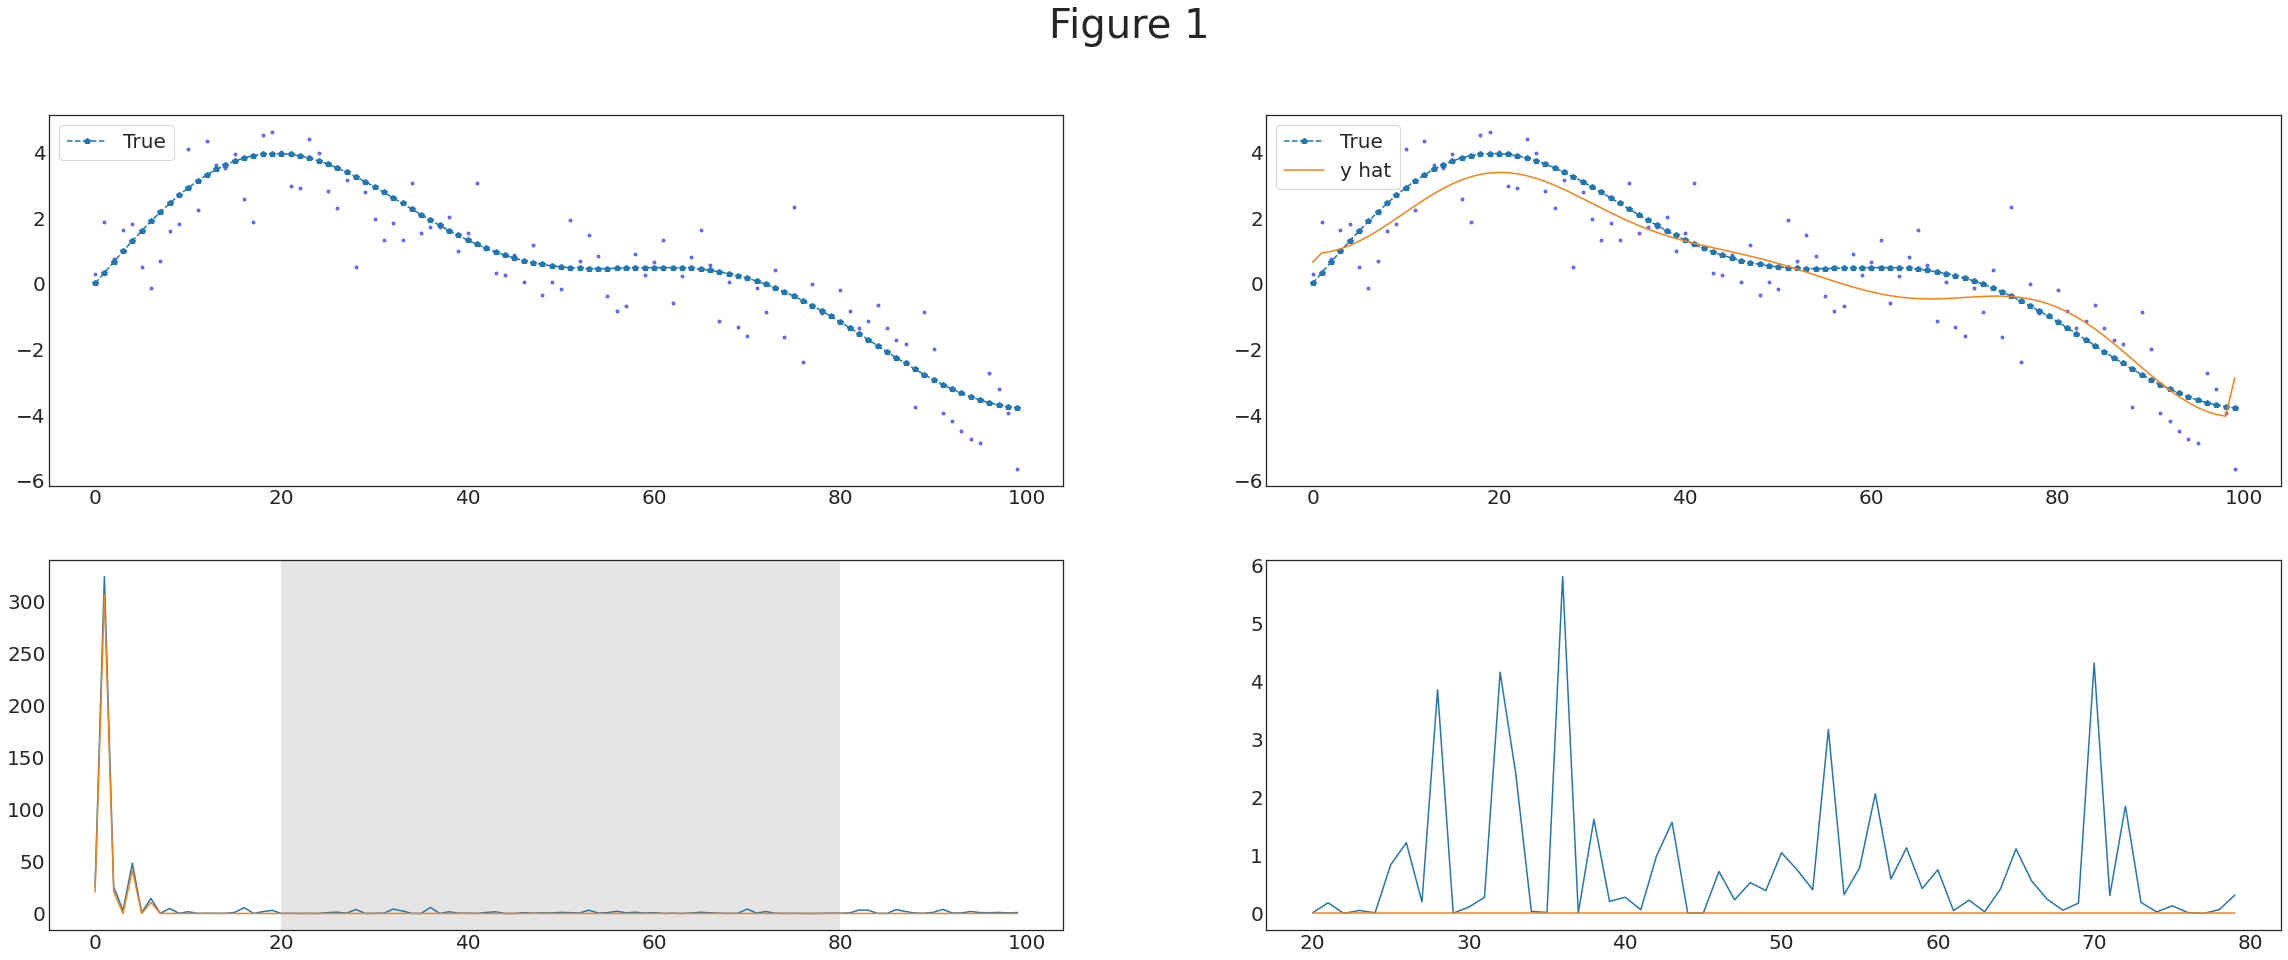

In [655]:
with plt.style.context('seaborn-white'):
    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(40,15))
    fig.suptitle('Figure 1',fontsize=40)
    
    ax1.plot(y, 'b.',alpha=0.5)
    ax1.plot(y_true,'p--',label='True')
    ax1.legend(fontsize=20,loc='upper left',facecolor='white', frameon=True)
    
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(y, 'b.',alpha=0.5)
    ax2.plot(y_true,'p--',label='True')
    ax2.plot(yhat,label='y hat')
    ax2.legend(fontsize=20,loc='upper left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot((fbar**2)) # periodogram 
    ax3.plot((fbar_threshed**2)) 
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    ax3.axvspan(20, 80, facecolor='gray', alpha=0.2)

    
    ax4.plot(range(20, 80),(fbar**2)[20:80]) # periodogram 
    ax4.plot(range(20, 80),(fbar_threshed**2)[20:80]) 
    ax4.set_xticks(range(20, 81, 10))
    ax4.set_xticklabels(range(20, 81, 10))
    # ax4.set_xticklabels(['20','40','60'])
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)

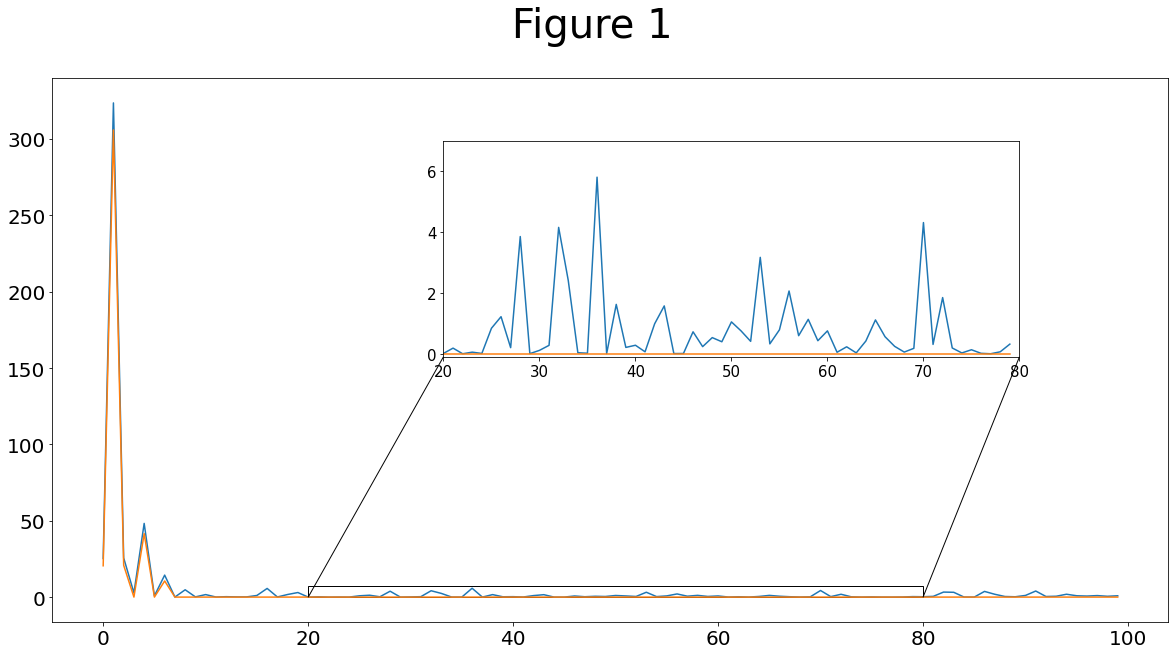

In [745]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
plt.figure(figsize = (20,10))
plt.suptitle('Figure 1',fontsize=40)
ax = plt.subplot(1, 1, 1)
ax.plot(range(0,100),(fbar**2))
ax.plot((fbar_threshed**2)) 
axins = inset_axes(ax, 8, 3, loc = 1, bbox_to_anchor=(0.8, 0.8),
                   bbox_transform = ax.figure.transFigure)
axins.plot(range(20, 80),(fbar**2)[20:80])
axins.plot(range(20, 80),(fbar_threshed**2)[20:80]) 
axins.set_xlim(20, 80)
axins.set_ylim(-0.1, 7)
mark_inset(ax, axins, loc1=4, loc2=3, fc="none", ec = "0.01")
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
axins.tick_params(axis='y', labelsize=15)
axins.tick_params(axis='x', labelsize=15)
plt.show()

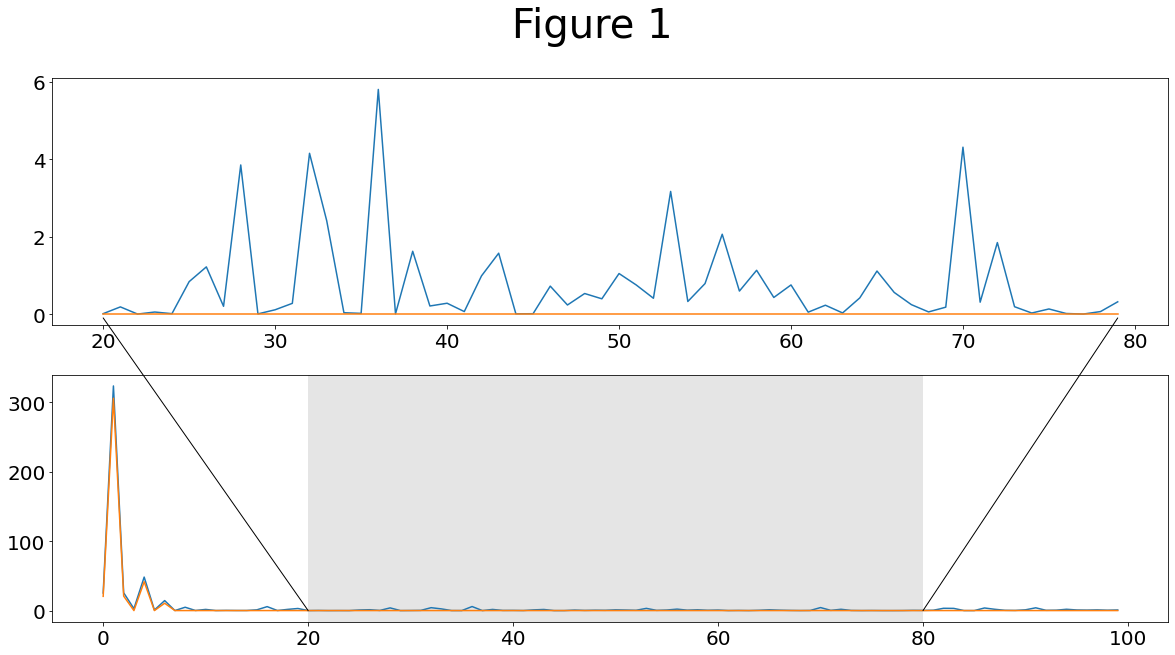

In [778]:
from matplotlib.patches import ConnectionPatch
fig = plt.figure(figsize=(20,10))
plt.suptitle('Figure 1',fontsize=40)
plot1 = fig.add_subplot(2,2,(1,2))

plot1.plot(range(20, 80),(fbar**2)[20:80]) # periodogram 
plot1.plot(range(20, 80),(fbar_threshed**2)[20:80]) 
plot1.set_xticks(range(20, 81, 10))
plot1.set_xticklabels(range(20, 81, 10))
plot1.tick_params(axis='y', labelsize=20)
plot1.tick_params(axis='x', labelsize=20)

plot3 = fig.add_subplot(2,2,(3,4)) 

plot3.plot((fbar**2)) # periodogram 
plot3.plot((fbar_threshed**2)) 
plot3.tick_params(axis='y', labelsize=20)
plot3.tick_params(axis='x', labelsize=20)
plot3.axvspan(20, 80, facecolor='gray', alpha=0.2)

# plot3.fill_between((20, 80), 10, 60, facecolor= "red", alpha = 0.2)
conn1 = ConnectionPatch(xyA = (20, -0.1), coordsA=plot1.transData,
                       xyB=(20, 0), coordsB=plot3.transData, color = 'black')
fig.add_artist(conn1)
conn2 = ConnectionPatch(xyA = (79, -0.1), coordsA=plot1.transData,
                       xyB=(80, 0), coordsB=plot3.transData, color = 'black')
fig.add_artist(conn2)
plt.show()